In [ ]:
!curl "https://awscli.amazonaws.com/awscli-exe-linux-x86_64.zip" -o "awscliv2.zip"
!unzip awscliv2.zip
!sudo ./aws/install

In [ ]:
!aws --version

aws-cli/2.13.18 Python/3.11.5 Linux/5.15.109+ exe/x86_64.ubuntu.22 prompt/off


In [ ]:
!aws s3 cp --no-sign-request --region us-east-1 s3://sevir/CATALOG.csv CATALOG.csv


download: s3://sevir/CATALOG.csv to ./CATALOG.csv                  


In [ ]:
!aws s3 sync --no-sign-request --region us-east-1 s3://sevir/data/ir069 .

download: s3://sevir/data/ir069/2018/SEVIR_IR069_RANDOMEVENTS_2018_0101_0430.h5 to 2018/SEVIR_IR069_RANDOMEVENTS_2018_0101_0430.h5
download: s3://sevir/data/ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0101_0630.h5 to 2018/SEVIR_IR069_STORMEVENTS_2018_0101_0630.h5
download: s3://sevir/data/ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0701_1231.h5 to 2018/SEVIR_IR069_STORMEVENTS_2018_0701_1231.h5
download: s3://sevir/data/ir069/2018/SEVIR_IR069_RANDOMEVENTS_2018_0901_1231.h5 to 2018/SEVIR_IR069_RANDOMEVENTS_2018_0901_1231.h5
download: s3://sevir/data/ir069/2018/SEVIR_IR069_RANDOMEVENTS_2018_0501_0831.h5 to 2018/SEVIR_IR069_RANDOMEVENTS_2018_0501_0831.h5
download: s3://sevir/data/ir069/2019/SEVIR_IR069_RANDOMEVENTS_2019_0101_0430.h5 to 2019/SEVIR_IR069_RANDOMEVENTS_2019_0101_0430.h5
download: s3://sevir/data/ir069/2019/SEVIR_IR069_RANDOMEVENTS_2019_0501_0831.h5 to 2019/SEVIR_IR069_RANDOMEVENTS_2019_0501_0831.h5
download: s3://sevir/data/ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0630.h5 to 2019/

In [ ]:
from PIL import Image
import os
os.environ["HDF5_USE_FILE_LOCKING"]='FALSE'
import h5py
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image as IPython_Image
import pandas as pd

number of events in the file: 545
Event ID: b'R18032212277468'
Image shape: (192, 192, 49)


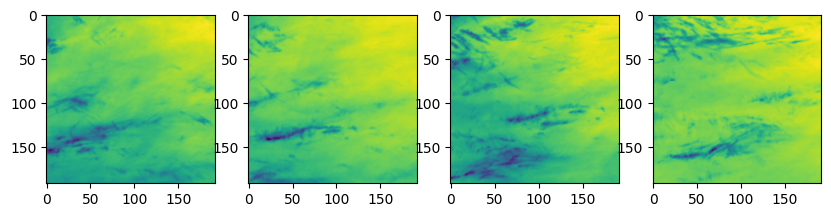

In [ ]:
file_index = 0
with h5py.File('/content/2018/SEVIR_IR069_RANDOMEVENTS_2018_0101_0430.h5','r') as hf:
    event_id = hf['id'][file_index]
    ir069      = hf['ir069'][file_index]
    print('number of events in the file:', len(hf['ir069']))

print('Event ID:',event_id)
print('Image shape:',ir069.shape)

fig,axs=plt.subplots(1,4,figsize=(10,5))
axs[0].imshow(ir069[:,:,10])
axs[1].imshow(ir069[:,:,20])
axs[2].imshow(ir069[:,:,30])
axs[3].imshow(ir069[:,:,40])
plt.show()

In [ ]:
def samples_to_gifs(sample_list, file_path, plot=False):
  with h5py.File(file_path,'r') as hf:
    for file_index in sample_list:
      event_id = hf['id'][file_index]
      ir069 = hf['ir069'][file_index]

      ir069 = ir069 * 1e-2  # Decoding according to dataset description
      gif_arr = 256 * ((ir069 - np.min(ir069)) / (np.max(ir069) - np.min(ir069))) # Standardization for sake of plotting
      gif_arr = np.moveaxis(gif_arr, -1, 0) # Time first!

      imgs = [Image.fromarray(img) for img in gif_arr]
      imgs[0].save(f"event_{file_index}.gif", save_all=True, append_images=imgs[1:], duration=50, loop=0)  # duration is the number of milliseconds between frames; this is 40 frames per second

      if plot:
        with open(f"event_{file_index}.gif",'rb') as f:
            display(IPython_Image(data=f.read(), format='png'))

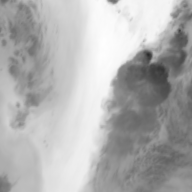

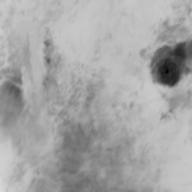

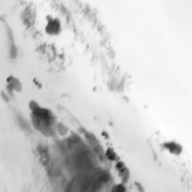

In [ ]:
samples_to_gifs([11,140,555],'/content/2018/SEVIR_IR069_STORMEVENTS_2018_0701_1231.h5', plot=True)

In [ ]:
files = ['/content/2018/'+f for f in os.listdir('/content/2018')] + ['/content/2019/'+f for f in os.listdir('/content/2019')]
num_events = 0
for f in files:
  with h5py.File(f,'r') as hf:
    num_events += len(hf['ir069'])
print('total number of event files of type ir069:', num_events)
catalog = pd.read_csv('CATALOG.csv')
print('total number of rows on catalog:', len(catalog[catalog.img_type == 'ir069'].index))

total number of event files of type ir069: 13552
total number of rows on catalog: 13552


<ipython-input-46-f0224f416100>:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  catalog = pd.read_csv('CATALOG.csv')


In [ ]:
catalog = catalog[catalog.img_type == 'ir069']
catalog.head()

id                                          file_name  file_index  \
1209  S728503  ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0101_0...           0   
1210  S764931  ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0101_0...           1   
1211  S745801  ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0101_0...           2   
1212  S760792  ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0101_0...           3   
1213  S766182  ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0101_0...           4   

     img_type             time_utc  \
1209    ir069  2018-01-22 03:26:00   
1210    ir069  2018-06-01 07:06:00   
1211    ir069  2018-04-14 07:42:00   
1212    ir069  2018-05-28 20:50:00   
1213    ir069  2018-06-22 19:52:00   

                                         minute_offsets  episode_id  event_id  \
1209  -121:-116:-111:-106:-101:-96:-91:-86:-81:-76:-...    121701.0  728503.0   
1210  -121:-116:-111:-106:-101:-96:-91:-86:-81:-76:-...    127581.0  764931.0   
1211  -122:-117:-112:-107:-102:-97:-92:-87:-82:-77:-...    124292.0  745801.0   
1212  -120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...    126924.0  760792.0   
1213  -122:-117:-112:-107:-102:-97:-92:-87:-82:-77:-...    126485.0  766182.0   

             event_type  llcrnrlat  ...  urcrnrlat  urcrnrlon  \
1209            Tornado  31.748748  ...  35.079995 -92.480682   
1210  Thunderstorm Wind  34.486373  ...  37.556087 -85.881760   
1211            Tornado  31.365664  ...  34.595688 -89.795483   
1212               Hail  37.399109  ...  40.714370 -92.063369   
1213  Thunderstorm Wind  36.045987  ...  38.707844 -76.642938   

                                                   proj size_x  size_y  \
1209  +proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...    192     192   
1210  +proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...    192     192   
1211  +proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...    192     192   
1212  +proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...    192     192   
1213  +proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...    192     192   

      height_m   width_m   data_min   data_max  pct_missing  
1209  384000.0  384000.0 -65.927589 -15.314308          0.0  
1210  384000.0  384000.0 -65.844963 -15.922436          0.0  
1211  384000.0  384000.0 -78.126976 -19.146570          0.0  
1212  384000.0  384000.0 -71.241829 -18.848705          0.0  
1213  384000.0  384000.0 -72.518394 -14.557942          0.0  

[5 rows x 21 columns]

In [ ]:
catalog.file_name.value_counts()

ir069/2018/SEVIR_IR069_RANDOMEVENTS_2018_0901_1231.h5    2172
ir069/2018/SEVIR_IR069_RANDOMEVENTS_2018_0501_0831.h5    2168
ir069/2019/SEVIR_IR069_RANDOMEVENTS_2019_0101_0430.h5    2016
ir069/2019/SEVIR_IR069_RANDOMEVENTS_2019_0901_1231.h5    1783
ir069/2019/SEVIR_IR069_RANDOMEVENTS_2019_0501_0831.h5    1710
ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0701_1231.h5      904
ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0101_0630.h5      833
ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0630.h5      729
ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0701_1231.h5      692
ir069/2018/SEVIR_IR069_RANDOMEVENTS_2018_0101_0430.h5     545
Name: file_name, dtype: int64

In [ ]:
catalog.event_type.value_counts()

Thunderstorm Wind    1509
Hail                  807
Flash Flood           288
Flood                 162
Tornado               157
Heavy Rain             84
Funnel Cloud           79
Lightning              72
Name: event_type, dtype: int64

In [ ]:
pd.crosstab(index=catalog.file_name,columns=catalog.event_type).style.background_gradient(cmap='Blues')

In [ ]:
catalog.head()

id                                          file_name  file_index  \
1209  S728503  ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0101_0...           0   
1210  S764931  ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0101_0...           1   
1211  S745801  ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0101_0...           2   
1212  S760792  ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0101_0...           3   
1213  S766182  ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0101_0...           4   

     img_type             time_utc  \
1209    ir069  2018-01-22 03:26:00   
1210    ir069  2018-06-01 07:06:00   
1211    ir069  2018-04-14 07:42:00   
1212    ir069  2018-05-28 20:50:00   
1213    ir069  2018-06-22 19:52:00   

                                         minute_offsets  episode_id  event_id  \
1209  -121:-116:-111:-106:-101:-96:-91:-86:-81:-76:-...    121701.0  728503.0   
1210  -121:-116:-111:-106:-101:-96:-91:-86:-81:-76:-...    127581.0  764931.0   
1211  -122:-117:-112:-107:-102:-97:-92:-87:-82:-77:-...    124292.0  745801.0   
1212  -120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...    126924.0  760792.0   
1213  -122:-117:-112:-107:-102:-97:-92:-87:-82:-77:-...    126485.0  766182.0   

             event_type  llcrnrlat  ...  urcrnrlat  urcrnrlon  \
1209            Tornado  31.748748  ...  35.079995 -92.480682   
1210  Thunderstorm Wind  34.486373  ...  37.556087 -85.881760   
1211            Tornado  31.365664  ...  34.595688 -89.795483   
1212               Hail  37.399109  ...  40.714370 -92.063369   
1213  Thunderstorm Wind  36.045987  ...  38.707844 -76.642938   

                                                   proj size_x  size_y  \
1209  +proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...    192     192   
1210  +proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...    192     192   
1211  +proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...    192     192   
1212  +proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...    192     192   
1213  +proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...    192     192   

      height_m   width_m   data_min   data_max  pct_missing  
1209  384000.0  384000.0 -65.927589 -15.314308          0.0  
1210  384000.0  384000.0 -65.844963 -15.922436          0.0  
1211  384000.0  384000.0 -78.126976 -19.146570          0.0  
1212  384000.0  384000.0 -71.241829 -18.848705          0.0  
1213  384000.0  384000.0 -72.518394 -14.557942          0.0  

[5 rows x 21 columns]

In [ ]:
catalog_subsets = []
for f in files:
  with h5py.File(f,'r') as hf:
    file_index = f[8:]
    catalog_subset = catalog[catalog['file_name'].str[5:] == file_index]
    for index,row in catalog_subset.iterrows():
      ir069 = hf['ir069'][row.file_index]
      ir069 = ir069 * 1e-2  # Decoding according to dataset description
      gif_arr = 256 * ((ir069 - np.min(ir069)) / (np.max(ir069) - np.min(ir069))) # Standardization for sake of plotting
      catalog_subset.loc[index,'mean'], catalog_subset.loc[index,'5th percentile'], catalog_subset.loc[index,'median'], catalog_subset.loc[index,'95th percentile'] = np.mean(gif_arr), np.percentile(gif_arr, 5), np.percentile(gif_arr, 50), np.percentile(gif_arr, 95)
    catalog_subsets.append(catalog_subset)

catalog = pd.concat(catalog_subsets, axis=0)

<ipython-input-53-4ee814afa916>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog_subset.loc[index,'mean'], catalog_subset.loc[index,'5th percentile'], catalog_subset.loc[index,'median'], catalog_subset.loc[index,'95th percentile'] = np.mean(gif_arr), np.percentile(gif_arr, 5), np.percentile(gif_arr, 50), np.percentile(gif_arr, 95)
<ipython-input-53-4ee814afa916>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog_subset.loc[index,'mean'], catalog_subset.loc[index,'5th percentile'], catalog_su

array([[<Axes: title={'center': 'mean'}>]], dtype=object)

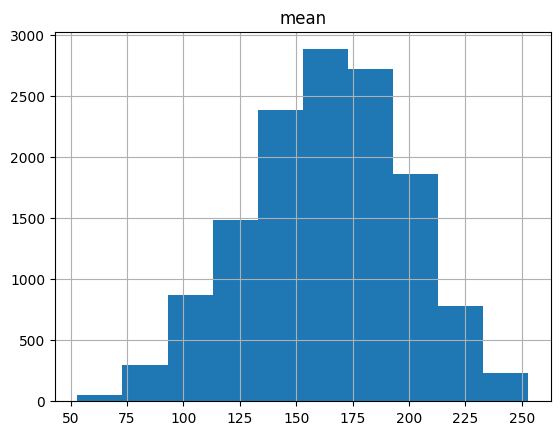

In [ ]:
catalog.hist(column='mean')

array([[<Axes: title={'center': '5th percentile'}>]], dtype=object)

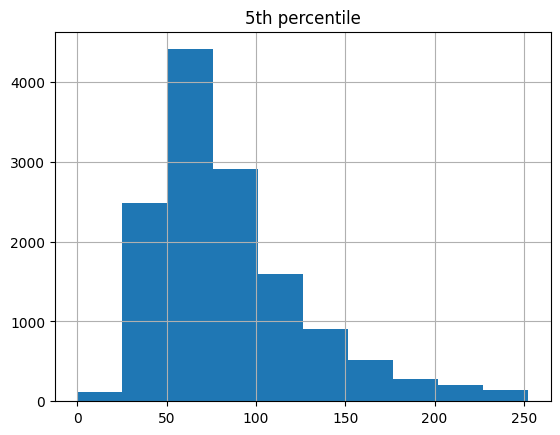

In [ ]:
catalog.hist(column='5th percentile')

array([[<Axes: title={'center': 'median'}>]], dtype=object)

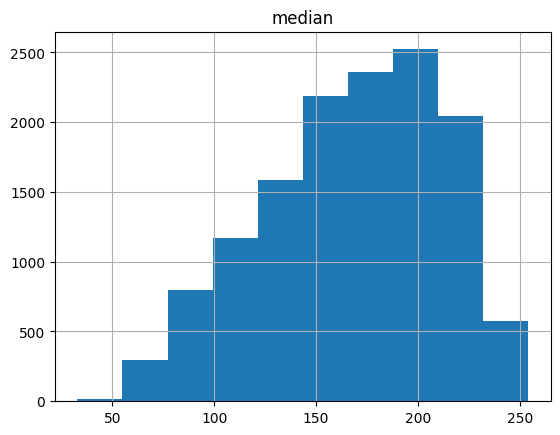

In [ ]:
catalog.hist(column='median')

array([[<Axes: title={'center': '95th percentile'}>]], dtype=object)

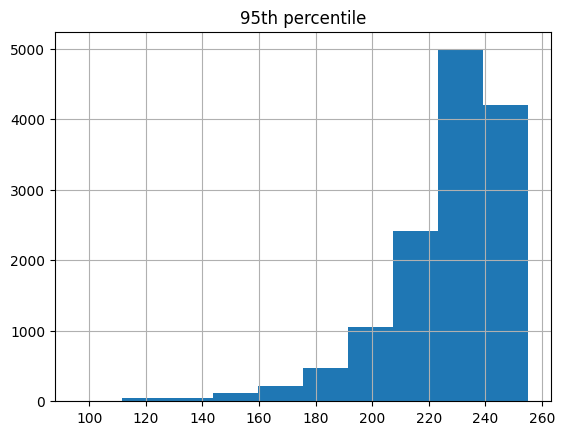

In [ ]:
catalog.hist(column='95th percentile')

In [ ]:
stats = catalog[['id','mean','5th percentile','median','95th percentile']]

In [ ]:
stats.to_csv('stats.csv')

In [ ]:
stats = pd.read_csv('stats.csv')
catalog = pd.read_csv('CATALOG.csv')
catalog = pd.merge(catalog, stats, on='id')

<ipython-input-65-def83416210a>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  catalog = pd.read_csv('CATALOG.csv')


## corrcoef as predictibility indicator

In [1]:
# TODO: repeated code just do the scaling here.
import numpy as np

class Scaler():
    def __init__(self, dataset: np.ndarray) -> None:
        self.min = dataset.min()
        self.max = dataset.max()

    def scale(self, array: np.ndarray) -> np.ndarray:
        return .5 - (array - self.min) / (self.max - self.min)

    def unscale(self, array: np.ndarray) -> np.ndarray:
        return ((.5 - array) * (self.max - self.min)) + self.min

In [2]:
import os
import numpy as np

files = [os.path.join('artifacts\SEVIR-latest', f) for f in os.listdir('artifacts\SEVIR-latest') if os.path.isfile(os.path.join('artifacts\SEVIR-latest', f))]
files = [files[f] for f in [1,4,7]]
dataset = []
for f in files:
    arr = np.load(f, allow_pickle=True)
    if arr.shape[1] > 192:
        arr = arr[:,::2,::2,:]
    print(arr.shape)
    dataset.append(Scaler(arr).scale(arr))

(200, 192, 192, 49)
(200, 192, 192, 49)
(200, 192, 192, 49)


In [3]:
import random
random.seed(42)
events_ind = random.choices(range(0, 45), k=200)

In [4]:
ir069_corrcoefs_offsets = {
    0 : [],
    1 : [],
    2 : [],
    3 : [],
    4 : [],
    5 : []
}
for e in range(200):
    for s in range(44):
        a = dataset[0][e,:,:,s]
        for o in range(6):
            b = dataset[0][e,:,:,s+o]
            ir069_corrcoefs_offsets[o].append(np.corrcoef(a.flatten(), b.flatten())[0,1])


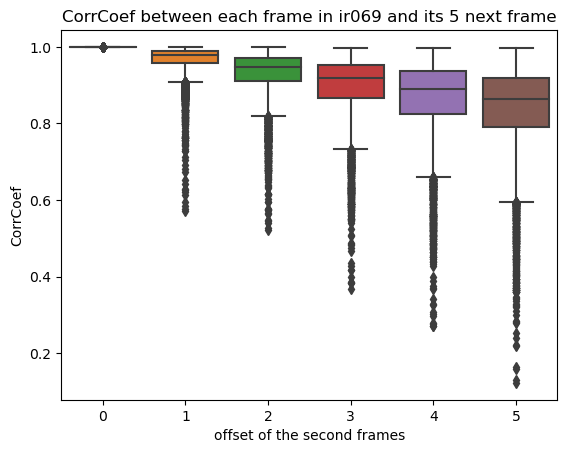

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=list(ir069_corrcoefs_offsets.values()))
plt.title('CorrCoef between each frame in ir069 and its 5 next frame')
plt.xlabel('offset of the second frames')
plt.ylabel('CorrCoef')
plt.show()

In [6]:
ir107_corrcoefs_offsets = {
    0 : [],
    1 : [],
    2 : [],
    3 : [],
    4 : [],
    5 : []
}
for e in range(200):
    for s in range(44):
        a = dataset[1][e,:,:,s]
        for o in range(6):
            b = dataset[1][e,:,:,s+o]
            ir107_corrcoefs_offsets[o].append(np.corrcoef(a.flatten(), b.flatten())[0,1])


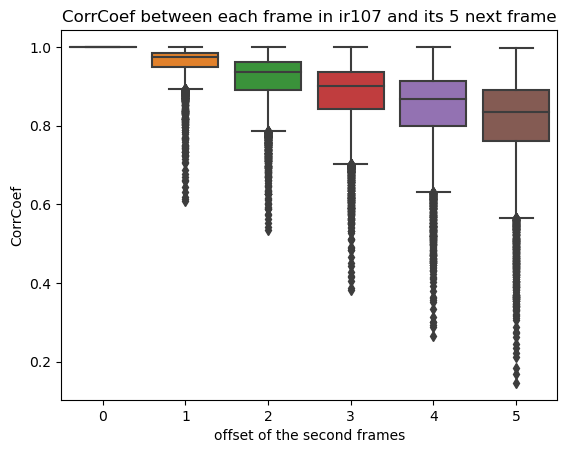

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=list(ir107_corrcoefs_offsets.values()))
plt.title('CorrCoef between each frame in ir107 and its 5 next frame')
plt.xlabel('offset of the second frames')
plt.ylabel('CorrCoef')
plt.show()

In [8]:
vil_corrcoefs_offsets = {
    0 : [],
    1 : [],
    2 : [],
    3 : [],
    4 : [],
    5 : []
}
for e in range(200):
    for s in range(44):
        a = dataset[2][e,:,:,s]
        for o in range(6):
            b = dataset[2][e,:,:,s+o]
            vil_corrcoefs_offsets[o].append(np.corrcoef(a.flatten(), b.flatten())[0,1])


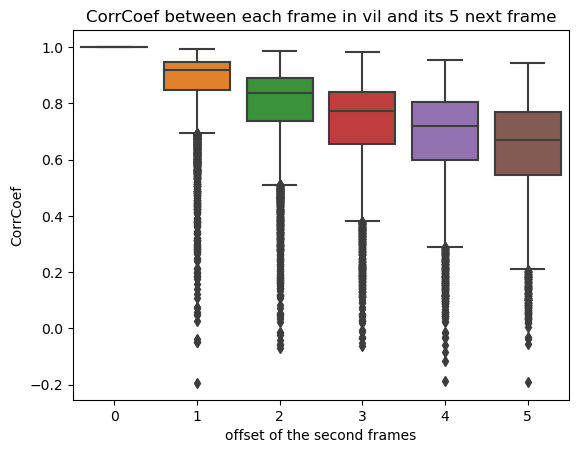

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=list(vil_corrcoefs_offsets.values()))
plt.title('CorrCoef between each frame in vil and its 5 next frame')
plt.xlabel('offset of the second frames')
plt.ylabel('CorrCoef')
plt.show()

In [10]:
wrt_ir069_corrcoefs_offsets = {
    'ir107' : [],
    'vil' : []
}
for e in range(200):
    for s in range(49):
        a = dataset[0][e,:,:,s]
        b = dataset[1][e,:,:,s]
        wrt_ir069_corrcoefs_offsets['ir107'].append(np.corrcoef(a.flatten(), b.flatten())[0,1])
        c = dataset[2][e,:,:,s]
        wrt_ir069_corrcoefs_offsets['vil'].append(np.corrcoef(a.flatten(), c.flatten())[0,1])

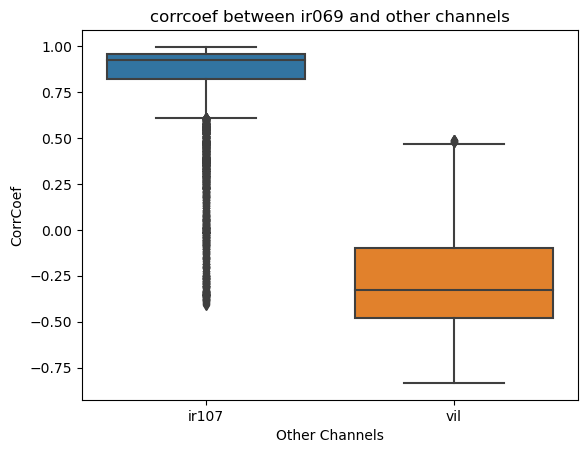

In [11]:
import pandas as pd
sns.boxplot(data=pd.DataFrame.from_dict(wrt_ir069_corrcoefs_offsets))
plt.title('corrcoef between ir069 and other channels')
plt.xlabel('Other Channels')
plt.ylabel('CorrCoef')
plt.show()

In [12]:
pred_ir107_corrcoefs_offsets = {
    0 : [],
    1 : [],
    2 : [],
    3 : [],
    4 : [],
    5 : []
}
for e in range(200):
    for s in range(44):
        a = dataset[1][e,:,:,s]
        for o in range(6):
            b = dataset[0][e,:,:,s+o]
            pred_ir107_corrcoefs_offsets[o].append(np.corrcoef(a.flatten(), b.flatten())[0,1])


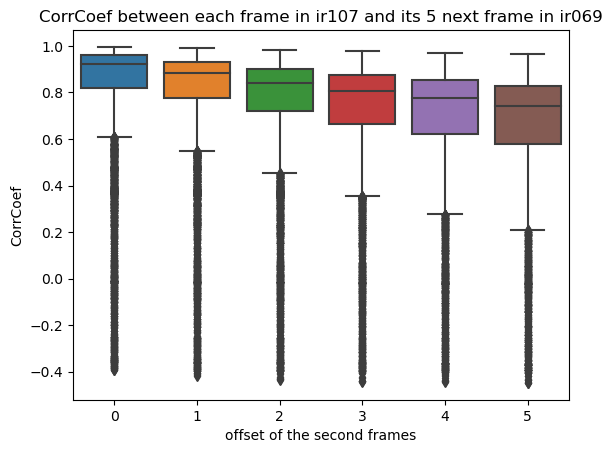

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=list(pred_ir107_corrcoefs_offsets.values()))
plt.title('CorrCoef between each frame in ir107 and its 5 next frame in ir069')
plt.xlabel('offset of the second frames')
plt.ylabel('CorrCoef')
plt.show()

In [14]:
pred_vil_corrcoefs_offsets = {
    0 : [],
    1 : [],
    2 : [],
    3 : [],
    4 : [],
    5 : []
}
for e in range(200):
    for s in range(44):
        a = dataset[2][e,:,:,s]
        for o in range(6):
            b = dataset[0][e,:,:,s+o]
            pred_vil_corrcoefs_offsets[o].append(np.corrcoef(a.flatten(), b.flatten())[0,1])


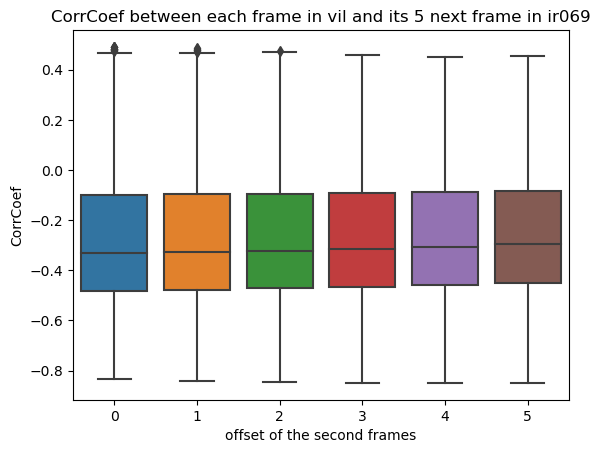

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=list(pred_vil_corrcoefs_offsets.values()))
plt.title('CorrCoef between each frame in vil and its 5 next frame in ir069')
plt.xlabel('offset of the second frames')
plt.ylabel('CorrCoef')
plt.show()

Vil corrcoef seems too weird!

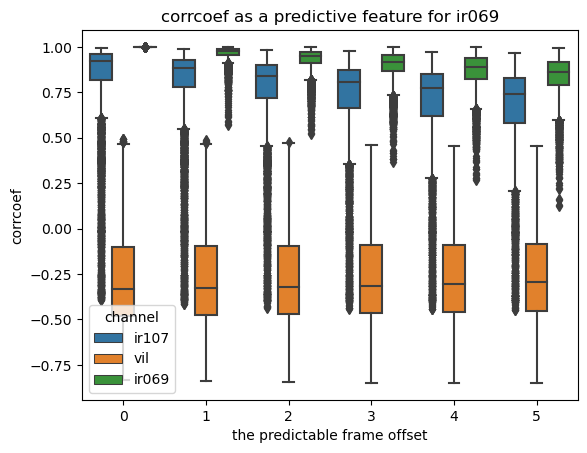

In [18]:
cc = []
for k,v in pred_ir107_corrcoefs_offsets.items():
    for c in v:
        cc.append(('ir107', k, c))
for k,v in pred_vil_corrcoefs_offsets.items():
    for c in v:
        cc.append(('vil', k, c))
for k,v in ir069_corrcoefs_offsets.items():
    for c in v:
        cc.append(('ir069', k, c))
df = pd.DataFrame(cc, columns=['channel', 'offset', 'corrcoef'])
sns.boxplot(data=df, x='offset', y='corrcoef', hue='channel')
plt.title('corrcoef as a predictive feature for ir069')
plt.xlabel('the predictable frame offset')
plt.ylabel('corrcoef')
plt.show()

Should we take vis as the ground truth? then pick the best or top 2 channels using this method?

thre is possibly something wrong with normalization of vil or the scaling or range. since the corrcoef seems too weird. Maybe at least needs to be flipped!